  <b>Name   : Shinde Saurabh Ashok <br>

  


<div align="center">
  <h1>Inc. 5000 Data Analysis</h1>
</div>

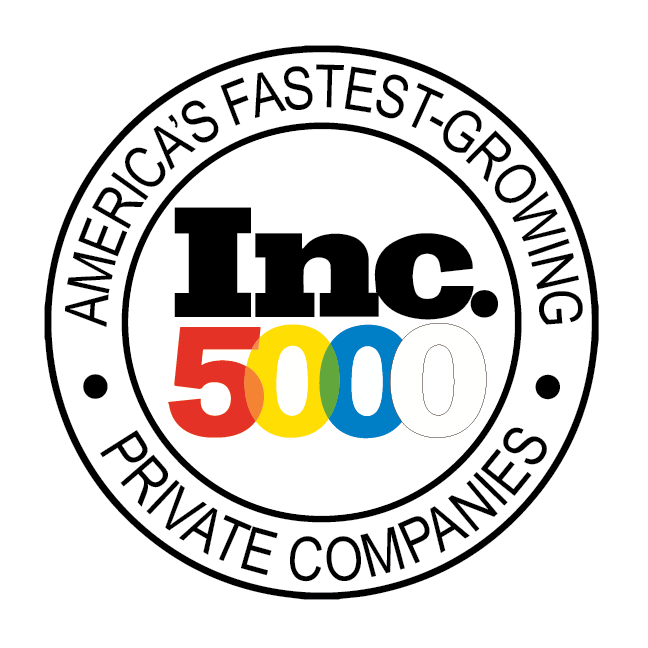




## Introduction

Every year, Inc. Magazine compiles a list called the Inc. 5000, which highlights the fastest-growing privately-held businesses in the country. These businesses, which span a variety of industries, are honored for their remarkable annual revenue growth. The Inc. 5000 list is now used as a standard to find high-potential companies that are significantly boosting the US economy.

We will examine the Inc. 5000 list in this data analysis project to learn more about the companies, sectors, and traits of the businesses that have shown impressive development. 


## Objectives

- Clean the data in the Inc. 5000 list.
- Provide descriptive statistics for revenue.
- Examine the data of high-revenue companies.
- Investigate growth trends and draw inference.

## Tools and Techniques

We will utilize a combination of data cleaning, exploratory data analysis (EDA), and visualization techniques to extract meaningful insights from the Inc. 5000 dataset.


Let's embark on this journey of uncovering the data behind the Inc. 5000 companies!



In [62]:
# Import required libraries.
import numpy as np
import pandas as pd

We are now importing the Inc. 5000 dataset in order to determine which 25 companies have shown to be very successful in generating income.

In [63]:
#Load the data from source file.
df=pd.read_excel('HW4_inc5000-2018.xlsx',index_col='RANK')

#Find the count of unique companies.
company_count=df['COMPANY NAME'].nunique()
print(f'Total number of companies on the list:{company_count}')

#Correcting rank column
df['RANK'] = range(1, 5001)
df.set_index('RANK', inplace=True)
#Find the top 25 companies.
rank_25=26
top_25=df.query('RANK<@rank_25')
print('Companies ranked within the top 25:')
top_25

Total number of companies on the list:5000
Companies ranked within the top 25:


,URL,CITY,GROWTH,EMPLOYEES,COMPANY NAME,WEBSITE,CITY.1,STATE,REVENUW,ZIP CODE,FOUNDED,INDUSTRY,"CITY, STATE",Unnamed: 14,Unnamed: 15
RANK,,,,,,,,,,,,,,,
1,https://www.inc.com/profile/swanleap,Madison,75660.8425,49,SwanLeap,http://swanleap.com,Wisconsin,WI,98965631,53719,2013.0,Logistics & Transportation,"Madison, WI",Makes software for the logistics industry that...,During stints as a freight broker and shipping...
2,https://www.inc.com/profile/popsockets,Boulder,71423.7620,118,PopSockets,http://popsockets.com,Colorado,CO,168837562,80301,2010.0,Consumer Products & Services,"Boulder, CO","Makes self-adhesive, collapsible, expandable c...",Frustrated with his iPhone headphones getting ...
3,https://www.inc.com/profile/home-chef,Chicago,60165.5058,865,Home Chef,homechef.com,Illinois,IL,255047839,60611,2013.0,Food & Beverage,"Chicago-Naperville-Elgin, IL-IN-WI",NaN,NaN
4,https://www.inc.com/profile/velocity-global,Denver,39816.5093,55,Velocity Global,http://velocityglobal.com,Colorado,CO,49175942,80205,2013.0,Business Products & Services,"Denver-Aurora-Lakewood, CO",NaN,NaN
5,https://www.inc.com/profile/depcom-power,Scottsdale,38962.9022,104,DEPCOM Power,depcompower.com,Arizona,AZ,219574136,85258,2013.0,Energy,"Phoenix-Mesa-Scottsdale, AZ",NaN,NaN
6,https://www.inc.com/profile/aeronux-airways,Marietta,20005.2390,17,Aeronux Airways,aeronux.com,Georgia,GA,21874500,30066,2011.0,Logistics & Transportation,"Atlanta-Sandy Springs-Roswell, GA",NaN,NaN
7,https://www.inc.com/profile/diamond-assets,Milton,19717.5129,41,Diamond Assets,diamond-assets.com,Wisconsin,WI,43084462,53563,2014.0,Computer Hardware,"Janesville, WI",NaN,NaN
8,https://www.inc.com/profile/gforce-life-sciences,Chicago,16426.6575,13,GForce Life Sciences,http://gforcestaff.com,Illinois,IL,16893384,60606,2013.0,Human Resources,"Chicago-Naperville-Elgin, IL-IN-WI",NaN,NaN
9,https://www.inc.com/profile/flexport,San Francisco,15911.2237,532,Flexport,http://flexport.com,California,CA,224745864,94102,2013.0,Logistics & Transportation,"San Francisco-Oakland-Hayward, CA",NaN,NaN


## Overview of Data 

It's clear from a close inspection that the dataset has a high standard of cleanliness. But there are several noteworthy findings:

1. Considering giving the 'REVENUW' column , the speclling needs to be corrected

2. The last two columns are useless and should be removed from the dataset because they don't include any meaningful data.

3. There are decimal values in the 'Founded' column, even though integer values should be present. This disparity needs to be fixed immediately.

4. We have already fixed the duplicate RANK in dataset.
5. Using present data in dataset we can meaningfully fill the 'CITY','STATE' and 'CITY, STATE'  columns.


In [64]:
#Check null data in each column
df.isnull().sum()

#Rename the column
df = df.rename(columns={'REVENUW': 'REVENUE'})

In [65]:

#Drop columns.
df_new = df.drop(columns=['Unnamed: 14','Unnamed: 15'], axis=1)

#Filling Missing Value in FOUNDED Column as 0 
df_new['FOUNDED'] = df_new['FOUNDED'].fillna(0)

#Making year data int.
df_new['FOUNDED'] = df_new['FOUNDED'].astype(int)


In [66]:
#Fill missing data in CITY, STATE
city_state = lambda df_new: f"{df_new['CITY']},{df_new['STATE']}" if pd.isnull(df_new['CITY, STATE']) and pd.notnull(df_new['CITY']) and pd.notnull(df_new['STATE']) else df_new['CITY, STATE'] #else df_new['CITY'] if pd.notnull(df_new['CITY']) else df_new['STATE']

#create new column in dataset
df_new['CITY, STATE'] = df_new.apply(city_state,axis=1)

#Fill Missing data for city and state column.
df_new['CITY_STATE'] = df_new['CITY, STATE'].str.split(',')
df_new['CITY'] = df_new['CITY'].fillna(df_new['CITY_STATE'].str[0])
df_new['STATE'] = df_new['STATE'].fillna(df_new['CITY_STATE'].str[1])
df_new
df_new['RANK'] = range(1, 5001)
df_new.set_index('RANK', inplace=True)
df_new

,URL,CITY,GROWTH,EMPLOYEES,COMPANY NAME,WEBSITE,CITY.1,STATE,REVENUE,ZIP CODE,FOUNDED,INDUSTRY,"CITY, STATE",CITY_STATE
RANK,,,,,,,,,,,,,,
1,https://www.inc.com/profile/swanleap,Madison,75660.8425,49,SwanLeap,http://swanleap.com,Wisconsin,WI,98965631,53719,2013,Logistics & Transportation,"Madison, WI","[Madison, WI]"
2,https://www.inc.com/profile/popsockets,Boulder,71423.7620,118,PopSockets,http://popsockets.com,Colorado,CO,168837562,80301,2010,Consumer Products & Services,"Boulder, CO","[Boulder, CO]"
3,https://www.inc.com/profile/home-chef,Chicago,60165.5058,865,Home Chef,homechef.com,Illinois,IL,255047839,60611,2013,Food & Beverage,"Chicago-Naperville-Elgin, IL-IN-WI","[Chicago-Naperville-Elgin, IL-IN-WI]"
4,https://www.inc.com/profile/velocity-global,Denver,39816.5093,55,Velocity Global,http://velocityglobal.com,Colorado,CO,49175942,80205,2013,Business Products & Services,"Denver-Aurora-Lakewood, CO","[Denver-Aurora-Lakewood, CO]"
5,https://www.inc.com/profile/depcom-power,Scottsdale,38962.9022,104,DEPCOM Power,depcompower.com,Arizona,AZ,219574136,85258,2013,Energy,"Phoenix-Mesa-Scottsdale, AZ","[Phoenix-Mesa-Scottsdale, AZ]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,https://www.inc.com/profile/pentec-health,Glen Mills,57.3485,580,Pentec Health,pentechealth.com,Pennsylvania,PA,160781213,19342,1983,Health,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD","[Philadelphia-Camden-Wilmington, PA-NJ-DE-MD]"
4997,https://www.inc.com/profile/progressive-freight,Thomasville,57.3364,12,Progressive Freight,progressivefreight.com,Georgia,GA,10728626,31799,2003,Logistics & Transportation,"Thomasville, GA","[Thomasville, GA]"
4998,https://www.inc.com/profile/traffic-planning-a...,Pottstown,57.2994,160,"Traffic Planning and Design, Inc.",trafficpd.com,Pennsylvania,PA,18215073,19464,1989,Engineering,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD","[Philadelphia-Camden-Wilmington, PA-NJ-DE-MD]"


In [67]:
#check null data
df_null=df_new[df_new.isna().any(axis=1)]
df_null
#remove extra column created.
df_new.drop(columns=['CITY_STATE'])
df_company=df_new.drop(columns=['CITY_STATE'])


## Region Data 
In order to improve business insights and analysis, we will now xtract the Region field from the region file.

In [68]:
#Load the region data from file to data fram
df_region = pd.read_csv('HW4_states_by_region.csv', index_col=0)
df_region
#Add the region column in company dataset.
df_company = pd.merge(df_company, df_region[['State Code', 'Region']], left_on='STATE', right_on='State Code', how='left')
df_company
df_company['RANK'] = range(1, 5001)
df_company.set_index('RANK', inplace=True)
df_company

,URL,CITY,GROWTH,EMPLOYEES,COMPANY NAME,WEBSITE,CITY.1,STATE,REVENUE,ZIP CODE,FOUNDED,INDUSTRY,"CITY, STATE",State Code,Region
RANK,,,,,,,,,,,,,,,
1,https://www.inc.com/profile/swanleap,Madison,75660.8425,49,SwanLeap,http://swanleap.com,Wisconsin,WI,98965631,53719,2013,Logistics & Transportation,"Madison, WI",WI,Midwest
2,https://www.inc.com/profile/popsockets,Boulder,71423.7620,118,PopSockets,http://popsockets.com,Colorado,CO,168837562,80301,2010,Consumer Products & Services,"Boulder, CO",CO,West
3,https://www.inc.com/profile/home-chef,Chicago,60165.5058,865,Home Chef,homechef.com,Illinois,IL,255047839,60611,2013,Food & Beverage,"Chicago-Naperville-Elgin, IL-IN-WI",IL,Midwest
4,https://www.inc.com/profile/velocity-global,Denver,39816.5093,55,Velocity Global,http://velocityglobal.com,Colorado,CO,49175942,80205,2013,Business Products & Services,"Denver-Aurora-Lakewood, CO",CO,West
5,https://www.inc.com/profile/depcom-power,Scottsdale,38962.9022,104,DEPCOM Power,depcompower.com,Arizona,AZ,219574136,85258,2013,Energy,"Phoenix-Mesa-Scottsdale, AZ",AZ,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,https://www.inc.com/profile/pentec-health,Glen Mills,57.3485,580,Pentec Health,pentechealth.com,Pennsylvania,PA,160781213,19342,1983,Health,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",PA,Northeast
4997,https://www.inc.com/profile/progressive-freight,Thomasville,57.3364,12,Progressive Freight,progressivefreight.com,Georgia,GA,10728626,31799,2003,Logistics & Transportation,"Thomasville, GA",GA,South
4998,https://www.inc.com/profile/traffic-planning-a...,Pottstown,57.2994,160,"Traffic Planning and Design, Inc.",trafficpd.com,Pennsylvania,PA,18215073,19464,1989,Engineering,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",PA,Northeast


### Revenue Analysis

During our investigation of the dataset, we looked closely at the statistics of the revenue. The figures show some intriguing trends:


We also looked into businesses that were established before 2015. We were interested in finding out which proportion of these reached a revenue milestone of at least $50 million. 



In [69]:
# min, max, median, and standard deviation
Min=df_company[["REVENUE"]].min()
Max=df_company[["REVENUE"]].max()
Median=df_company[["REVENUE"]].median()
sd=df_company[["REVENUE"]].std()
print(f'Minimum revenue:{Min.values[0]:.2f}$')
print(f'Maximum revenue:{Max.values[0]:.2f}$')
print(f'Median revenue:{Median.values[0]:.2f}$')
print(f'Standard Deviation of revenue:{sd.values[0]:.2f}$')


Minimum revenue:1952209.00$
Maximum revenue:16433210000.00$
Median revenue:9575009.50$
Standard Deviation of revenue:282990264.70$


In [70]:
#Assign values to required variables for calculation.
year1=0
year2=2015
rev=50000000
val1=df_company.query('FOUNDED>@year1 and FOUNDED<@year2 and REVENUE>@rev')['COMPANY NAME'].nunique()
val2=df_company.query('FOUNDED>@year1 and FOUNDED<@year2 ')['COMPANY NAME'].nunique()
print(f'Percentage of companies founded prior to 2015 who have achieved revenue of at least $50 million is {val1*100/val2:.2f}%')

Percentage of companies founded prior to 2015 who have achieved revenue of at least $50 million is 13.63%


## INFERENCE
Afer doing the discriptive analysis of the data we can infer that revenues of the companies are highly spread. Also it indicates that few companies are dominating the market with higher revenue.

## Business Understanding with Python Function

Being able to quickly glean important insights from data is essential in the ever-changing field of business analytics. We have created a potent Python function to meet this purpose. 

### Customized Research 

We can now concentrate on particular categories and values of interest thanks to this feature. We are able to obtain insights that are directly in line with our strategic goals thanks to this degree of personalization. 
We will display the top companies as per the given category and value.
If the input is not provided we will give overall top companies as per revenue.



In [71]:
#create a function

def process_data(df_company,category=None,value=None,n=10):
    #Return only if category and value is provided.
    if category is not None and value is not None:
        return df_company[df_company[category]==value].nlargest(n,'REVENUE')
    else:
        return df_company.nlargest(n,'REVENUE')
        
 
    

# The top fifteen overall companies

In [72]:
df_top15=process_data(df_company,n=15) 
df_top15

,URL,CITY,GROWTH,EMPLOYEES,COMPANY NAME,WEBSITE,CITY.1,STATE,REVENUE,ZIP CODE,FOUNDED,INDUSTRY,"CITY, STATE",State Code,Region
RANK,,,,,,,,,,,,,,,
1288,https://www.inc.com/profile/prime-therapeutics,Eagan,372.1123,4329,Prime Therapeutics,primetherapeutics.com,Minnesota,MN,16433210000,55121,1998,Health,"Minneapolis-St. Paul-Bloomington, MN-WI",MN,Midwest
1318,https://www.inc.com/profile/allied-universal,Santa Ana,363.0638,150000,Allied Universal,aus.com,California,CA,5301534000,92705,1965,Security,"Los Angeles-Long Beach-Anaheim, CA",CA,West
4226,https://www.inc.com/profile/carahsoft-technology,Reston,80.4559,900,Carahsoft Technology,carahsoft.com,Virginia,VA,4107537719,20190,2004,Government Services,"Washington-Arlington-Alexandria, DC-VA-MD-WV",VA,South
3439,https://www.inc.com/profile/endeavor,Beverly Hills,110.9724,6200,Endeavor,endeavorco.com,New York,NY,3541178000,90210,1995,Media,"Los Angeles-Long Beach-Anaheim, CA",NY,Northeast
4341,https://www.inc.com/profile/drivetime,Tempe,76.6689,6111,DriveTime,drivetime.com,Arizona,AZ,3267077000,85281,2002,Consumer Products & Services,"Phoenix-Mesa-Scottsdale, AZ",AZ,West
4204,https://www.inc.com/profile/armada,Pittsburgh,81.1360,468,ARMADA,armada.net,Pennsylvania,PA,2950772000,15238,1890,Logistics & Transportation,"Pittsburgh, PA",PA,Northeast
3546,https://www.inc.com/profile/srs-distribution,McKinney,106.2021,3132,SRS Distribution,srsdistribution.com,Texas,TX,2183778171,75070,2008,Consumer Products & Services,"Dallas-Fort Worth-Arlington, TX",TX,South
2064,https://www.inc.com/profile/pinnacle-group,Dallas,216.2477,1563,Pinnacle Group,pinnacle1.com,Texas,TX,2110176184,75240,1996,Human Resources,"Dallas-Fort Worth-Arlington, TX",TX,South
4973,https://www.inc.com/profile/insight-global,Atlanta,58.1746,2570,Insight Global,insightglobal.com,Georgia,GA,1928758851,30319,2001,Business Products & Services,"Atlanta-Sandy Springs-Roswell, GA",GA,South


# The top ten companies in the food and beverage industry.

In [73]:
df_food=process_data(df_company,category='INDUSTRY',value='Food & Beverage') 
df_food

,URL,CITY,GROWTH,EMPLOYEES,COMPANY NAME,WEBSITE,CITY.1,STATE,REVENUE,ZIP CODE,FOUNDED,INDUSTRY,"CITY, STATE",State Code,Region
RANK,,,,,,,,,,,,,,,
3757,https://www.inc.com/profile/jersey-mikes-subs,Manasquan,97.4898,19000,Jersey Mike's Subs,jerseymikes.com,New Jersey,NJ,974782877,8736,1956,Food & Beverage,"New York-Newark-Jersey City, NY-NJ-PA",NJ,Northeast
3483,https://www.inc.com/profile/monogram-foods,Memphis,108.5890,2700,Monogram Foods,monogramfoods.com,Tennessee,TN,670665838,38117,2004,Food & Beverage,"Memphis, TN",TN,South
998,https://www.inc.com/profile/gps-hospitality,Atlanta,493.1933,11016,GPS Hospitality,gpshospitality.com,Georgia,GA,551176689,30328,2012,Food & Beverage,"Atlanta-Sandy Springs-Roswell, GA",GA,South
3434,https://www.inc.com/profile/freddys-frozen-cus...,Wichita,111.0822,11886,Freddy's Frozen Custard & Steakburgers,freddysusa.com,Kansas,KS,410993763,67206,2002,Food & Beverage,"Wichita, KS",KS,Midwest
4061,https://www.inc.com/profile/blount-fine-foods,Fall River,86.0419,628,Blount Fine Foods,blountfinefoods.com,Massachusetts,MA,338254000,1760,1946,Food & Beverage,"Boston-Cambridge-Newton, MA-NH",MA,Northeast
3,https://www.inc.com/profile/home-chef,Chicago,60165.5058,865,Home Chef,homechef.com,Illinois,IL,255047839,60611,2013,Food & Beverage,"Chicago-Naperville-Elgin, IL-IN-WI",IL,Midwest
3537,https://www.inc.com/profile/coopers-hawk-winer...,Countryside,106.4360,4155,Cooper's Hawk Winery & Restaurants,chwinery.com,Illinois,IL,241827341,60525,2005,Food & Beverage,"Chicago-Naperville-Elgin, IL-IN-WI",IL,Midwest
2436,https://www.inc.com/profile/nothing-bundt-cakes,Addison,177.5477,230,Nothing Bundt Cakes,nothingbundtcakes.com,Texas,TX,220026175,75001,1997,Food & Beverage,"Dallas-Fort Worth-Arlington, TX",TX,South
515,https://www.inc.com/profile/mod-pizza,Bellevue,979.4089,5500,MOD Pizza,modpizza.com,Washington,WA,219487000,98008,2008,Food & Beverage,"Seattle-Tacoma-Bellevue, WA",WA,West


# The top three companies located in New York City

In [74]:
process_data(df_company,category='CITY',value='New York City',n=3) 

,URL,CITY,GROWTH,EMPLOYEES,COMPANY NAME,WEBSITE,CITY.1,STATE,REVENUE,ZIP CODE,FOUNDED,INDUSTRY,"CITY, STATE",State Code,Region
RANK,,,,,,,,,,,,,,,
4855,https://www.inc.com/profile/sterling-talent-so...,New York City,61.7196,4087,Sterling Talent Solutions,sterlingtalentsolutions.com,New York,NY,480956135,10004,1975,Business Products & Services,"New York-Newark-Jersey City, NY-NJ-PA",NY,Northeast
71,https://www.inc.com/profile/compass,New York City,4309.0950,464,Compass,compass.com,New York,NY,370560142,10011,2012,Real Estate,"New York-Newark-Jersey City, NY-NJ-PA",NY,Northeast
97,https://www.inc.com/profile/peloton,New York City,3710.7823,872,Peloton,onepeloton.com,New York,NY,328337000,10001,2012,Retail,"New York-Newark-Jersey City, NY-NJ-PA",NY,Northeast


# The top five companies in Maryland

In [75]:
process_data(df_company,category='STATE',value='MD',n=5)

,URL,CITY,GROWTH,EMPLOYEES,COMPANY NAME,WEBSITE,CITY.1,STATE,REVENUE,ZIP CODE,FOUNDED,INDUSTRY,"CITY, STATE",State Code,Region
RANK,,,,,,,,,,,,,,,
3357,https://www.inc.com/profile/infiniti-hr,Burtonsville,115.2400,34499,INFINITI HR,infinitihr.com,Maryland,MD,371942140,20866,2008,Human Resources,"Washington-Arlington-Alexandria, DC-VA-MD-WV",MD,South
349,https://www.inc.com/profile/t-rex-solutions,Greenbelt,1427.5775,385,T-Rex Solutions,trexsolutionsllc.com,Maryland,MD,195539254,20770,1999,Government Services,"Washington-Arlington-Alexandria, DC-VA-MD-WV",MD,South
3196,https://www.inc.com/profile/the-maryland-and-d...,Salisbury,122.8835,30,The Maryland and Delaware Group of Long and Fo...,easternshorehomesolutions.com,Maryland,MD,106544544,21801,2014,Real Estate,"Salisbury, MD",MD,South
1732,https://www.inc.com/profile/n2grate,Greenbelt,263.3315,44,n2grate,n2grate.com,Maryland,MD,101674761,20770,2010,Government Services,"Washington-Arlington-Alexandria, DC-VA-MD-WV",MD,South
2077,https://www.inc.com/profile/tista-science-and-...,Rockville,214.2944,296,TISTA Science and Technology,tistatech.com,Maryland,MD,95475617,20854,2005,Government Services,"Washington-Arlington-Alexandria, DC-VA-MD-WV",MD,South


## Honors for Businesses in the Service Sector

Companies will be recognized according to their revenue for outstanding performance in the service sectors. This includes businesses that are classified as "Services" in their sector. The following is how the awards will be given out:

- **Trailblazer Award**: Given to the top 25% of service industry businesses according to revenue.
- **Pioneer Award**: Given to businesses that rank in the top half but not the top quarter.


In [91]:
# Find Service industries.
df_awards=df_company.query('INDUSTRY.str.contains("Services")', engine='python')

#Sort industries by Revenue.
df_awards = df_awards.sort_values(by='REVENUE',ascending=False)
pd.options.mode.chained_assignment = None

# Calculate quartiles
df_quarters = pd.qcut(df_awards['REVENUE'], q=4, labels=False)

#Calculate first quarter companies.
trailblazer = df_awards[df_quarters == 3]
df_trailblazer=trailblazer
df_trailblazer['Award']='Trailblazer Award'

#Calculate second quarter companies.
pioneer=df_awards[df_quarters == 2]
df_pioneer=pioneer
df_pioneer['Award']='Pioneer Award'
df_pioneer

#Merge two dataframes.
df_award = pd.concat([df_trailblazer,df_pioneer])
df_company_awards=df_award[['COMPANY NAME','REVENUE','Award']]
df_company_awards.reset_index(drop=True)
df_company_awards


,COMPANY NAME,REVENUE,Award
RANK,,,
4226,Carahsoft Technology,4107537719,Trailblazer Award
4341,DriveTime,3267077000,Trailblazer Award
3546,SRS Distribution,2183778171,Trailblazer Award
4973,Insight Global,1928758851,Trailblazer Award
2110,Jeunesse Global,1300731294,Trailblazer Award
...,...,...,...
2551,Rastaclat,9544805,Pioneer Award
285,2M Research,9540000,Pioneer Award
1302,Language on Demand,9529200,Pioneer Award


## INSIGHTS
Let's dive into visualizing the top five states with the most service industries. We'll investigate what makes these states hubs for service-based businesses and understand the factors contributing to their success and growth.

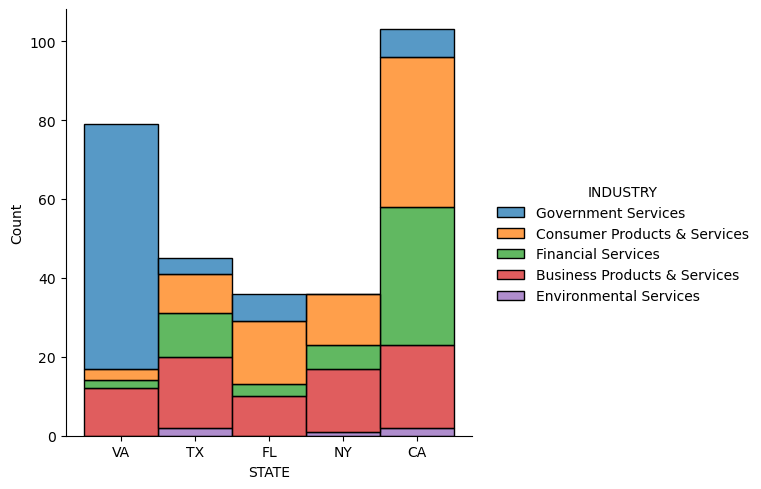

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

#sns.set_theme(style="ticks")
df_analysis = pd.merge(df_company_awards, df_company[['COMPANY NAME','INDUSTRY','GROWTH','STATE']], left_on='COMPANY NAME', right_on='COMPANY NAME')
df_analysis

df_analysis
industry_count = df_analysis.groupby('STATE')['INDUSTRY'].count()

# Sort the states by count in descending order and get the top 5
top5_state = industry_count.sort_values(ascending=False).head(5)
df_states = pd.DataFrame({'STATE': top5_state.index, 'COUNT': top5_state.values})
df_visual=df_analysis[df_analysis['STATE'].isin(df_states['STATE'])]
#state=df_analysis.STATE.isin(top5_state.STATE)
df_visual
sns.displot(df_visual, x="STATE", hue="INDUSTRY", multiple="stack",binwidth=10)

<b>Inference:</b> 
1) Virginia(VA) is very close to the United States capital, Washington, D.C. Because of its proximity, it is an appealing location for enterprises that provide government services. It facilitates communication between government departments, contractors, and business.
2) California(CA) In terms of innovation and technology, the state leads the world. The Bay Area's Silicon Valley is home to a large number of startups and tech giants. The development of innovative consumer products and services is fueled by this concentration of innovation.


